In [148]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pymongo
import numpy as np

In [3]:
# connect to mongo db
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client.movie_db
col_tomato = db['rotten_tomato']

In [6]:
# load tomate data from mongo db
tomato_data = pd.DataFrame(list(col_tomato.find()))[['critic(%)', 'critic_count', 'critic_fresh', 'critic_rate', 'critic_rot', 'name', 'user(%)', 'user_number', 'user_rate', 'year']]
tomato_data.head()

,critic(%),critic_count,critic_fresh,critic_rate,critic_rot,name,user(%),user_number,user_rate,year
0,93,404,375,8.2/10,29,Star Wars Ep. VII: The Force Awakens,87,"229,322",4.3/5,2015
1,82,303,249,7.4/10,54,Avatar,82,"1,381,863",4.1/5,2009
2,97,446,432,8.2/10,14,Black Panther,79,"84,175",4.1/5,2018
3,85,408,345,7.6/10,63,Avengers: Infinity War,91,"51,037",4.5/5,2018
4,89,184,163,8/10,21,Titanic,69,"35,797,356",3.3/5,1997


In [10]:
# load imdb data
col_imdb = db['imdb']
imdb_data = pd.DataFrame(list(col_imdb.find()))[['Title', 'imdbVotes', 'imdbRating']]

In [11]:
# load 'Star Wars Ep. VII: The Force Awakens' rate and vote in imdb_data
imdb_data.loc[0, 'Title'] = 'Star Wars Ep. VII: The Force Awakens'
imdb_data.loc[0, 'imdbVotes'] = 767831
imdb_data.loc[0, 'imdbRating'] = 8.0
imdb_data.head()

,Title,imdbVotes,imdbRating
0,Star Wars Ep. VII: The Force Awakens,767831,8
1,Avatar,"1,013,715",7.8
2,Black Panther,"430,289",7.4
3,Avengers: Infinity War,"550,743",8.5
4,Titanic,"926,635",7.8


In [14]:
#load metacretic data
col_meta = db['metacritic']
meta_data = pd.DataFrame(list(col_meta.find()))[['critic_score', 'genres', 'title', 'user_score']]
meta_data.head()

,critic_score,genres,title,user_score
0,81,"[Action, Adventure, Sci-Fi, Fantasy]",Star Wars Ep. VII: The Force Awakens,6.8
1,83,"[Action, Adventure, Sci-Fi, Fantasy]",Avatar,7.5
2,88,"[Action, Adventure, Sci-Fi, Drama]",Black Panther,6.6
3,68,"[Action, Adventure, Sci-Fi, Fantasy]",Avengers: Infinity War,8.6
4,75,"[Drama, Romance]",Titanic,8.5


In [22]:
test = tomato_data['critic_rate'][0]
float(test[:-3]) * 10

82.0

In [58]:
# merge 3 dataframe to do 'user VS cretic'
user_cretic_rate =  pd.DataFrame(
    data={
        'tomato_critic': [float(item[:-3]) * 10 for item in tomato_data['critic_rate']],
        'tomato_user': [float(item[:-2]) * 20 for item in tomato_data['user_rate']],
        'meta_critic': [float(item) for item in meta_data['critic_score']],
        'meta_user': [float(item) * 10 for item in meta_data['user_score']],
        'movie': meta_data['title'],
        'imdb_user': [float(item) * 10 for item in imdb_data['imdbRating']],
        'id': list(range(1, 101))
    }
)
user_cretic_rate.head()

,id,imdb_user,meta_critic,meta_user,movie,tomato_critic,tomato_user
0,1,80.0,81.0,68.0,Star Wars Ep. VII: The Force Awakens,82.0,86.0
1,2,78.0,83.0,75.0,Avatar,74.0,82.0
2,3,74.0,88.0,66.0,Black Panther,82.0,82.0
3,4,85.0,68.0,86.0,Avengers: Infinity War,76.0,90.0
4,5,78.0,75.0,85.0,Titanic,80.0,66.0


In [55]:
user_cretic_rate.loc[38, 'movie'] = 'Beauty and the Beast(1991)'
user_cretic_rate.loc[71, 'movie'] = "Pirates of the Caribbean: At World's End"
user_cretic_rate.loc[20, 'movie'] = "Pirates of the Caribbean: Dead Man's Chest"

In [59]:
user_cretic_rate.head()

,id,imdb_user,meta_critic,meta_user,movie,tomato_critic,tomato_user
0,1,80.0,81.0,68.0,Star Wars Ep. VII: The Force Awakens,82.0,86.0
1,2,78.0,83.0,75.0,Avatar,74.0,82.0
2,3,74.0,88.0,66.0,Black Panther,82.0,82.0
3,4,85.0,68.0,86.0,Avengers: Infinity War,76.0,90.0
4,5,78.0,75.0,85.0,Titanic,80.0,66.0


In [60]:
user_cretic_rate['overall_user'] = round((user_cretic_rate['tomato_user'] + user_cretic_rate['meta_user'] + user_cretic_rate['imdb_user']) / 3, 1)
user_cretic_rate['overall_critic'] = (user_cretic_rate['tomato_critic'] + user_cretic_rate['meta_critic']) /2
user_cretic_rate.head()

,id,imdb_user,meta_critic,meta_user,movie,tomato_critic,tomato_user,overall_user,overall_critic
0,1,80.0,81.0,68.0,Star Wars Ep. VII: The Force Awakens,82.0,86.0,78.0,81.5
1,2,78.0,83.0,75.0,Avatar,74.0,82.0,78.3,78.5
2,3,74.0,88.0,66.0,Black Panther,82.0,82.0,74.0,85.0
3,4,85.0,68.0,86.0,Avengers: Infinity War,76.0,90.0,87.0,72.0
4,5,78.0,75.0,85.0,Titanic,80.0,66.0,76.3,77.5


In [139]:
# ranking VS rate
ax1 = user_cretic_rate[['meta_user', 'tomato_user', 'imdb_user']]
ax2 = user_cretic_rate[['meta_user', 'tomato_user']]
ax3 = user_cretic_rate[['meta_critic', 'tomato_critic']]
ax4 = user_cretic_rate[['overall_critic', 'overall_user']]

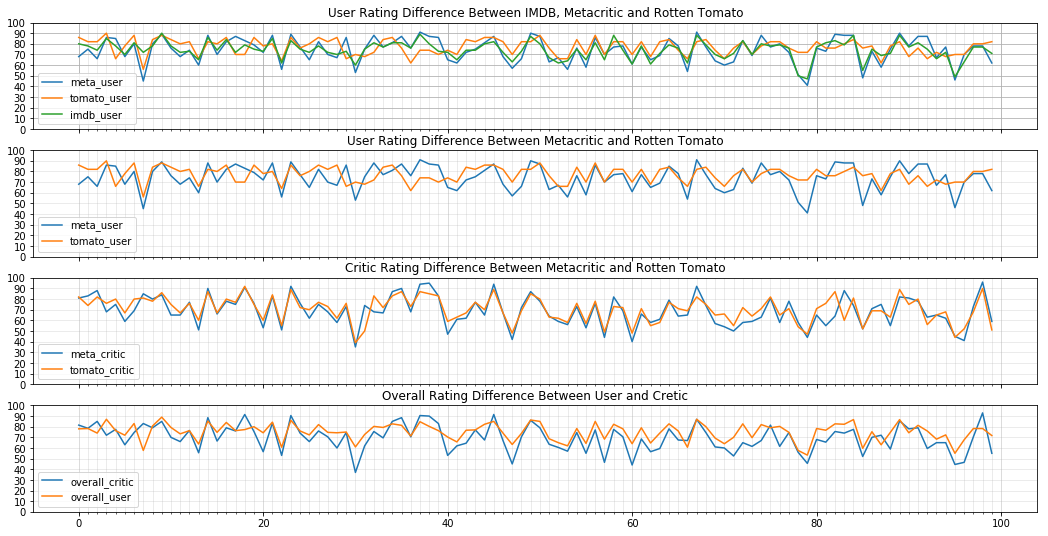

In [160]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18, 9), sharex=True)
ax1.plot(ax=axes[0], grid=True)
ax2.plot(ax=axes[1], grid=True)
ax3.plot(ax=axes[2], grid=True)
ax4.plot(ax=axes[3], grid=True)
axes[0].set_title('User Rating Difference Between IMDB, Metacritic and Rotten Tomato')
axes[1].set_title('User Rating Difference Between Metacritic and Rotten Tomato')
axes[2].set_title('Critic Rating Difference Between Metacritic and Rotten Tomato')
axes[3].set_title('Overall Rating Difference Between User and Cretic')

x_ticks = np.arange(0, 101, 1)
y_ticks = np.arange(0, 101, 10)

axes[0].set_xticks(x_ticks, minor=True)
axes[0].set_yticks(y_ticks)
axes[1].set_yticks(y_ticks)
axes[2].set_yticks(y_ticks)
axes[3].set_yticks(y_ticks)

# And a corresponding grid
axes[0].grid(which='both', alpha=0.3)
axes[1].grid(which='both', alpha=0.3)
axes[2].grid(which='both', alpha=0.3)
axes[3].grid(which='both', alpha=0.3)

plt.savefig('')

In [39]:
final_plot = user_cretic_rate.set_index('movie')[:10]
final_plot

,id,imdb_user,meta_critic,meta_user,tomato_critic,tomato_user,overall_user,overall_critic
movie,,,,,,,,
Star Wars Ep. VII: The Force Awakens,0,80.0,81.0,68.0,82.0,86.0,78.0,81.5
Avatar,1,78.0,83.0,75.0,74.0,82.0,78.3,78.5
Black Panther,2,74.0,88.0,66.0,82.0,82.0,74.0,85.0
Avengers: Infinity War,3,85.0,68.0,86.0,76.0,90.0,87.0,72.0
Titanic,4,78.0,75.0,85.0,80.0,66.0,76.3,77.5
Jurassic World,5,70.0,59.0,68.0,67.0,78.0,72.0,63.0
The Avengers,6,81.0,69.0,80.0,80.0,88.0,83.0,74.5
Star Wars Ep. VIII: The Last Jedi,7,72.0,85.0,45.0,81.0,56.0,57.7,83.0
Incredibles 2,8,78.0,80.0,80.0,78.0,84.0,80.7,79.0


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


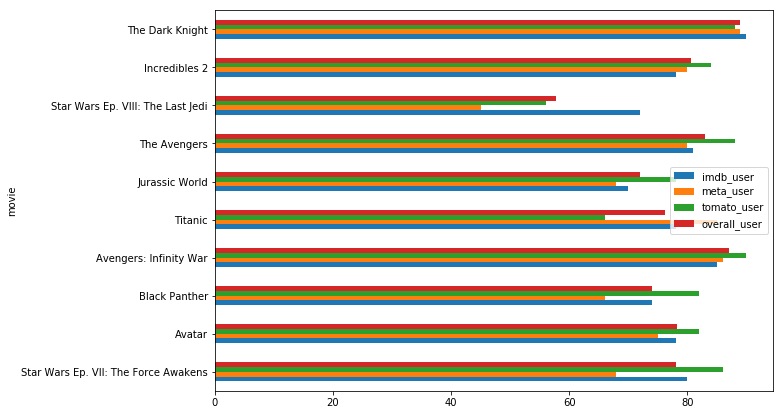

In [17]:
user_plot = final_plot[:10].plot(kind='barh', 
                           y=['imdb_user', 'meta_user', 'tomato_user', 'overall_user'],
                           figsize=(10, 7)).get_figure().savefig("graph/top10_user", bbox_inches="tight")

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


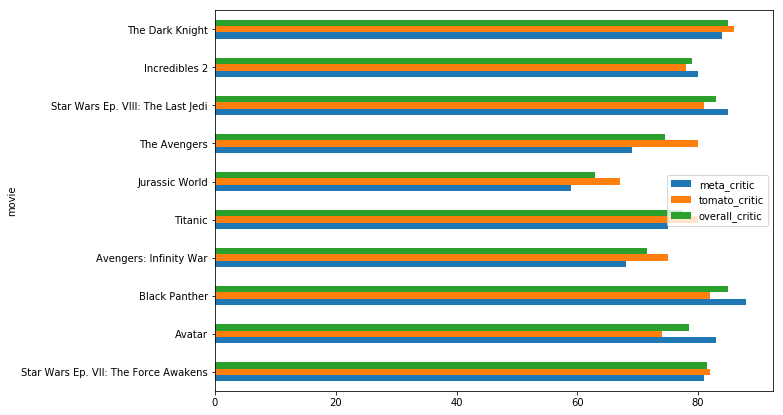

In [19]:
critic_plot = final_plot[:10].plot(kind='barh', 
                           y=['meta_critic', 'tomato_critic', 'overall_critic'],
                           figsize=(10, 7)).get_figure().savefig("graph/top10_critic", bbox_inches="tight")

In [40]:
def diffrent_rate(movie, critic, user, column, id_):
    different = pd.DataFrame(
        data={
            'movie': movie,
            'id': id_,
            column: critic - user 
        }
    )
    
    return different

In [41]:
# plot tomato different
tomato_dif = diffrent_rate(user_cretic_rate.movie, user_cretic_rate['tomato_critic'], user_cretic_rate['tomato_user'],
             'tomato_dif(%)', user_cretic_rate['id'])

In [42]:
# plot metacretic different
meta_dif = diffrent_rate(user_cretic_rate.movie, user_cretic_rate['meta_critic'], user_cretic_rate['meta_user'],
             'meta_dif(%)', user_cretic_rate['id'])

In [43]:
# plot overall different
overall_dif = diffrent_rate(user_cretic_rate.movie, user_cretic_rate['overall_critic'], user_cretic_rate['overall_user'],
             'overall_dif(%)', user_cretic_rate['id'])

In [44]:
dif_df = tomato_dif.merge(meta_dif, on='id').merge(overall_dif, on='id').drop(columns=['movie_x', 'movie_y'])

In [45]:
#top 10 movies critic like but not users
cri_like_df = dif_df.loc[dif_df['tomato_dif(%)'] > 0].loc[dif_df['meta_dif(%)'] > 0].sort_values('overall_dif(%)').set_index('movie')

In [46]:
cri_like_df

,id,tomato_dif(%),meta_dif(%),overall_dif(%)
movie,,,,
Star Wars Ep. IV: A New Hope,14,5.0,2.0,3.2
Harry Potter and the Goblet of Fire,90,7.0,3.0,3.7
Toy Story 3,23,3.0,3.0,4.5
The Lord of the Rings: The Return of the King,37,13.0,3.0,5.8
Indiana Jones and the Kingdom of the Crystal Skull,66,3.0,11.0,6.3
Inside Out,45,3.0,7.0,6.5
Finding Nemo,35,11.0,3.0,7.2
"The Chronicles of Narnia: The Lion, the Witch and the Wardrobe",87,7.0,17.0,9.0
Beauty and the Beast(1991),38,11.0,8.0,9.7


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


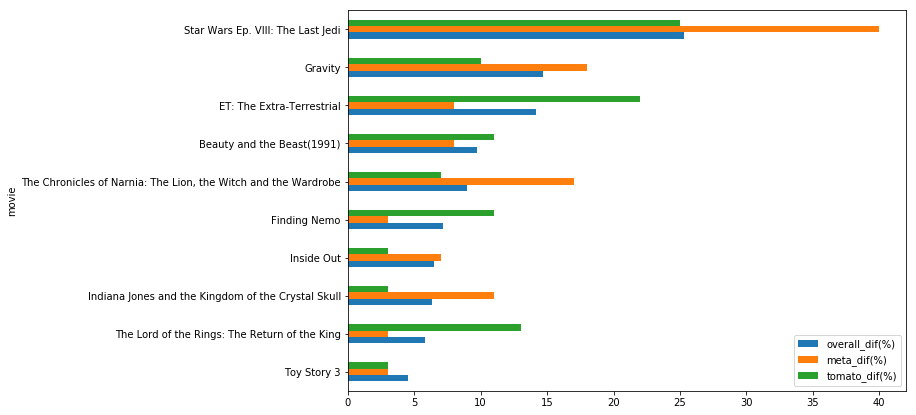

In [404]:
cri_like_plot = cri_like_df[-10:].plot(kind='barh', 
                      y=['overall_dif(%)','meta_dif(%)', 'tomato_dif(%)'], 
                      figsize=(10, 7))
cri_like_plot.get_figure().savefig("graph/critic_like_plot", bbox_inches="tight")

In [47]:
# top 10 movies like by users but not critics
user_like_df = dif_df.loc[dif_df['tomato_dif(%)'] < 0].loc[dif_df['meta_dif(%)'] < 0].sort_values('overall_dif(%)').set_index('movie')
user_like_plot = user_like_df[:10]

In [48]:
user_like_plot['overall_dif(%)'] = user_like_plot['overall_dif(%)'].abs()
user_like_plot['tomato_dif(%)'] = user_like_plot['tomato_dif(%)'].abs()
user_like_plot['meta_dif(%)'] = user_like_plot['meta_dif(%)'].abs()
user_like_plot

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,id,tomato_dif(%),meta_dif(%),overall_dif(%)
movie,,,,
Transformers: Revenge of the Fallen,30,31.0,18.0,24.0
Batman v Superman: Dawn of Justice,57,21.0,26.0,21.8
Meet the Fockers,96,18.0,29.0,21.2
Suicide Squad,60,22.0,21.0,20.0
The Hobbit: An Unexpected Journey,76,17.0,22.0,18.8
Transformers: Dark of the Moon,47,22.0,15.0,18.3
Pirates of the Caribbean: Dead Man's Chest,20,18.0,19.0,17.8
Star Wars Ep. VI: Return of the Jedi,72,10.0,25.0,17.7
Pirates of the Caribbean: At World's End,71,21.0,13.0,17.5


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


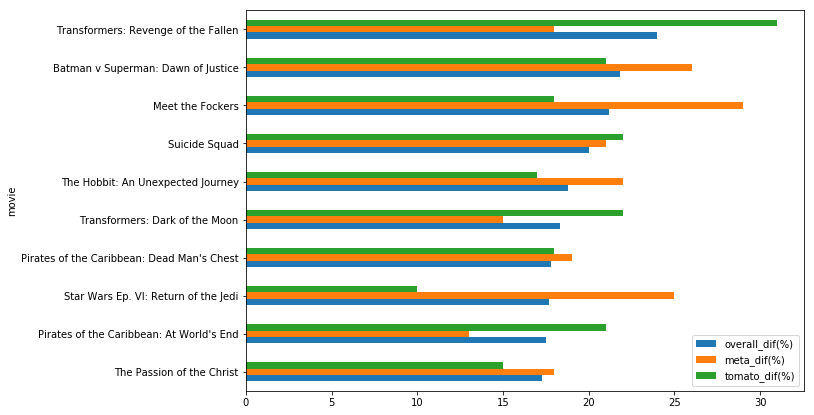

In [407]:
user_like_df[:10].sort_values('overall_dif(%)').plot(kind='barh', 
                      y=['overall_dif(%)','meta_dif(%)', 'tomato_dif(%)'], 
                      figsize=(10, 7)).get_figure().savefig("graph/user_like_plot", bbox_inches="tight")

In [49]:
# get the percentage of different rate
dif_count_data = {
        'Rotten Tomato': [dif_df.loc[dif_df['tomato_dif(%)'] > 5]['movie'].count(), 
                          dif_df.loc[dif_df['tomato_dif(%)'] < -5]['movie'].count()],
        'MetaCritic': [dif_df.loc[dif_df['meta_dif(%)'] > 5]['movie'].count(),
                       dif_df.loc[dif_df['meta_dif(%)'] < -5]['movie'].count()],
        'Overall': [dif_df.loc[dif_df['overall_dif(%)'] > 5]['movie'].count(),
                    dif_df.loc[dif_df['overall_dif(%)'] < -5]['movie'].count()]
    }
dif_count_df = pd.DataFrame(dif_count_data, index=['Critic Prefer', 'User Prefer']).T

In [50]:
dif_count_df['Difference < 5%'] = 100 - dif_count_df['Critic Prefer'] - dif_count_df['User Prefer']

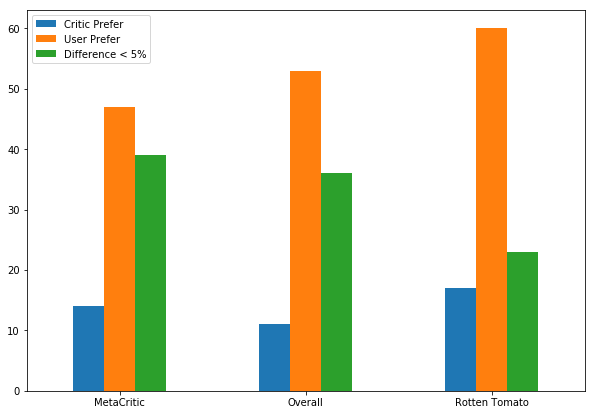

In [385]:
dif_count_df.plot(kind='bar', figsize=(10, 7), rot=0).get_figure().savefig("graph/dif_count", bbox_inches="tight")